# Funktionen und Module

Durch die beiden vorherigen Kapitel sind Sie in der Lage dazu nahezu beliebige Programme für alle erdenklichen Anwendungen zu schreiben. Das schöne ist aber, dass die aller meisten Probleme schon einmal gelöst wurden und die Lösungen in Form von Funktionen und Modulen in Python zur Verfügung stehen. In diesem Kapitel lernen Sie, wie Sie Funktionen und Module verwenden und wie Sie eigene Funktionen und Module schreiben.

## Funktionen

Funktionen erhöhen die Lesbarkeit und Wiederverwendbarkeit von Code. Sie sind ein wichtiger Bestandteil der Programmierung. Funktionen sind Namen für wiederverwendbare Codeblöcke. Sie können Parameter entgegennehmen und Werte zurückgeben.

In Python werden Funktionen mit dem Schlüsselwort `def` definiert. Der Funktionskörper wird eingerückt. Die Funktion wird mit dem Schlüsselwort `return` beendet. Der Ausdruck nach `return` ist der Rückgabewert der Funktion, der in der Zeile in der die Funktion aufgerufen wird, weiter verwendet werden kann.

```
def <function_name>(<parameter> : <type>) -> <return_type>:
    <function_body>
    return <return_value>

```

Im Folgenden Beispiel wird eine Funktion `two_times()` definiert, die einen Parameter `x` entgegennimmt und den Wert `2*x` zurückgibt.

In [1]:
def two_times(x: int) -> int:
    y = 2 * x
    return y

y : int = two_times(5)
print(y)

10


Wir können die Funktion mit verschiedenen Werten aufrufen und den Rückgabewert verwenden.

In [2]:
y : int = two_times(2)
print(y)

4


In [3]:
y : int = two_times(3)
print(y)

6


### Beispiel Zählen von Codons

Wir haben im letzten Abschnitt gesehen, wie wir die Anzahl and Codons in einer DNA-Sequenz zählen können. Wir können diese Funktionalität in eine Funktion `count_codons()` auslagern. Die Funktion nimmt eine DNA-Sequenz als Parameter und gibt ein Dictionary zurück, das die Anzahl der Vorkommen jedes Codons in der Sequenz enthält.

In [4]:
sequence : str = "TGCTAACCCCTAATGCCTTCCTTGGATGTGGTAGCTATTTTTCTCAGGATCCCTCTCCGGAATCGAACCATAACTGATTTATAAATG"

codons_dict : dict = {}

for start_position in range(0, len(sequence), 3):

    codon = sequence[start_position:start_position+3]
    
    if codon in codons_dict:
        codons_dict[codon] = codons_dict[codon] + 1
    else:
        codons_dict[codon] = 1

print(codons_dict)

{'TGC': 1, 'TAA': 2, 'CCC': 1, 'CTA': 1, 'ATG': 2, 'CCT': 2, 'TCC': 1, 'TTG': 1, 'GAT': 2, 'GTG': 1, 'GTA': 1, 'GCT': 1, 'ATT': 1, 'TTT': 1, 'CTC': 2, 'AGG': 1, 'ATC': 1, 'CGG': 1, 'AAT': 1, 'CGA': 1, 'ACC': 1, 'ATA': 1, 'ACT': 1, 'TTA': 1}


Wir können uns zunächst die Funktion `count_codons()` mit ihren Parametern und Rückgabewerten anlegen, bevor wird überlegen was darin passieren soll.

In [5]:
def count_codons(dna: str) -> dict:
    pass
    return codons_dict

Innerhalb der Funktion muss nun bei jedem Aufruf ein leeres Dictionary angelegt werden, das die Anzahl der Vorkommen der Codons speichert. Dann muss die Sequenz durchlaufen werden und für jedes Codon die Anzahl der Vorkommen im Dictionary erhöht werden. Am Ende wird das Dictionary zurückgegeben.

Alles was in der Funktion passiert, muss um eine Ebene eingerückt werden. Die Funktion wird mit dem Schlüsselwort `return` beendet und gibt das Dictionary zurück.

In [6]:
def count_codons(sequence):
    codons_dict = {}
    for start_position in range(0, len(sequence), 3):
        codon = sequence[start_position:start_position+3]
        if codon in codons_dict:
            codons_dict[codon] = codons_dict[codon] + 1
        else:
            codons_dict[codon] = 1
    return codons_dict

Nachdem wir die Zelle mit der Funktionsdefinition ausgeführt haben, können wir die Funktion `count_codons()` verwenden, um die Anzahl der Vorkommen der Codons in verschiedenen DNA-Sequenzen zu zählen.

In [7]:
print(count_codons("TATTATTAG"))
print(count_codons("TATTATTAT"))

{'TAT': 2, 'TAG': 1}
{'TAT': 3}


### ✍️ Aufgabe: Normalisierungs-Funktion

Schreiben Sie eine Funktion `normalize`, die eine Liste von Zahlen als Argument nimmt und die Liste so verändert, dass die Summe der Zahlen 1 ergibt. Die Funktion soll die veränderte Liste zurückgeben.

Bonus: Packen Sie das Ergebnis wieder in ein Dictionary, das die ursprünglichen Zahlen als Schlüssel und die normalisierten Zahlen als Werte enthält.

In [8]:
my_genes : list[str] = ["BRCA1", "TP53", "EGFR", "PTEN", "CDH1"]
my_expressions : list[float] = [5.3, 2.7, 0.1, 1.2, 3.8]

max_expression : float = max(my_expressions)
min_expression : float = min(my_expressions)

normalized_values : list[float]  = []

for expression in my_expressions:
    normalized_value = (expression - min_expression) / (max_expression - min_expression)
    normalized_values.append(normalized_value)

print(normalized_values)

[1.0, 0.5, 0.0, 0.2115384615384615, 0.7115384615384615]


In [9]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }

def normalize(expression_values : list[float]) -> list[float]:

    max_expression : float = max(expression_values)
    min_expression : float = min(expression_values)
    normalized_values : list[float] = []
    for expression in expression_values:
        normalized_value = (expression - min_expression) / (max_expression - min_expression)
        normalized_values.append(normalized_value)
    return normalized_values

print(normalize([5.3, 2.7, 0.1, 1.2, 3.8]))
print(normalize([5.3, 2.7, 0.1, 1.2, 3.8, 10.0]))

[1.0, 0.5, 0.0, 0.2115384615384615, 0.7115384615384615]
[0.5252525252525253, 0.26262626262626265, 0.0, 0.11111111111111109, 0.3737373737373737, 1.0]


## Module

Python hat in seiner Grundausstattung eine Vielzahl von Funktionen und Klassen, die wie bisher überwiegend genutzt haben. Die große Stärke von Python ist jedoch die Vielzahl von Modulen, die von der Community entwickelt und geteilt werden. Ein Modul ist eine Sammlung von Funktionen und Klassen, die in einer Datei gespeichert sind. Ein Modul kann in einem anderen Skript importiert und verwendet werden. So gibt es beispielsweise das Modul `math`, das [mathematische Funktionen und Konstanten](https://docs.python.org/3/library/math.html) enthält. Das Modul `random` enthält Funktionen zur Erzeugung von Zufallszahlen.

### Importieren von Modulen

Bevor wir ein Modul verwenden können, müssen wir es importieren. Inhalte einen Moduls (Funktionen, Klassen, Variablen) können dann mit dem Punkt-Operator `.` aufgerufen werden:

```Python
import <module_name>
<module_name>.<function_name>(<parameter>)
```

Falls wird das Modul noch nicht importiert haben, ist es Python unbekannt und wird einen Fehler werfen:

In [10]:
math.pi

NameError: name 'math' is not defined

Nach dem Import stehen uns z.B. die Variable `pi` und Funktion `sin()` des Moduls zur Verfügung. Wir können sie verwenden, um z.B. mathematische Berechnungen durchzuführen:

In [ ]:
import math

pi : float = math.pi

print(pi)

print(math.sin(pi/2))

3.141592653589793
1.0


### ✍️ Aufgabe: Berechnung Kreisfläche


Wichtig ist es sich in neuen Modulen zurechtzufinden. Die [Dokumentation](https://docs.python.org/3/library/index.html) ist eine gute Anlaufstelle, um sich über die Funktionen und Klassen in einem Modul zu informieren. Für das Modul `math` finden Sie die Dokumentation [hier](https://docs.python.org/3/library/math.html).

Schreiben Sie eine Formel zur Berechnung der Fläche eines Kreises. Verwenden Sie dazu die Konstante `pi` und die Funktion `pow()` aus dem Modul `math`.

$$A(r) = \pi r^2$$

In [ ]:
import math

def circle_area(radius : float) -> float:
    return math.pi * radius ** 2

print(circle_area(5))

78.53981633974483


### Installieren von Modulen am Beispiel `biopython`

Nicht alle Pakete, die wir je benutzen wollen, sind in der Standardbibliothek enthalten. Es gibt jedoch eine Vielzahl von Paketen, die von der Python-Community entwickelt und geteilt werden. Diese Pakete können mit dem Paketmanager `pip` installiert werden. Der Befehl `pip install <package_name>` installiert das Paket `<package_name>`.

Beispielsweise können wir das Paket `biopython` installieren, das Funktionen zur Arbeit mit biologischen Daten enthält. Das Paket `biopython` enthält Funktionen zur Arbeit mit DNA-Sequenzen, Proteinsequenzen und biologischen Datenbanken.

In Jupyter-Notebooks können wir den Befehl `!` verwenden, um Befehle in der Kommandozeile auszuführen. Der Befehl `!pip install biopython` installiert das Paket `biopython`.

In [ ]:
# Vor der Installation von Biopython ist der Befehl noch unbekannt
biopython

NameError: name 'biopython' is not defined

Mit dem Befehl `!pip install biopython` installieren wir das Paket `biopython`. Sollte das Paket bereits installiert sein, wird der Befehl ausgeben, dass das Paket bereits installiert ist.

In [ ]:
!pip install biopython

#### Anlegen von Nukleotid-Sequenzen

Eine Funktionalität, die wir mit `biopython` erhalten, ist die Möglichkeit, Sequenzen in verschiedenen Formaten zu lesen und zu schreiben. Wir können beispielsweise DNA-Sequenzen aus einer Datei lesen und in ein `Seq`-[Objekt](https://biopython.org/docs/1.75/api/Bio.Seq.html) umwandeln. Das `Seq`-Objekt ist ein spezieller Datentyp (vergleichbar eines Strings), der in `biopython` definiert ist und Funktionen zur Arbeit mit DNA-Sequenzen enthält.

In [ ]:
# Aus dem Paket Bio, aus dem Modul Seq, importiere die Klasse Seq
from Bio.Seq import Seq

# Zunächst erstellen wir eine Sequenz, wie gewohnt als String
my_dna_seg_str : str = "AGTACACTGGT"

# Wir erstellen ein Objekt der Klasse Seq, indem wir den String übergeben
# Das erstellen von Objekten sieht aus, wie das Aufrufen einer Funktion
# Der Rückgabewert der Funktion ist das Objekt, das wir erstellen wollen
my_dna_seq = Seq(my_dna_seg_str)

print(type(my_dna_seq))


<class 'Bio.Seq.Seq'>


##### Analyse von Nukleotid-Sequenzen
Tatsächlich ist jetzt in der Variablen `my_dna_seq` ein Objekt der Klasse `Seq` gespeichert. Das Objekt enthält die DNA-Sequenz und Funktionen zur Arbeit mit DNA-Sequenzen. In der Dokumentation des Moduls `biopython` finden Sie eine [Übersicht](https://biopython.org/docs/1.75/api/Bio.Seq.html) über die Funktionen und Klassen, die das Modul enthält.

Beispielsweise können wir einfach Auswerten, wie oft eine Sequenz in einer anderen Sequenz vorkommt:

In [ ]:
my_dna_seq.count("A")

3

In [ ]:
my_dna_seq.count("AG")

1

##### Arbeit mit Nukleotid-Sequenzen

Wenn wird davon ausgehen, dass wir nicht den Coding Strand der DNA-Sequenz in der Variablen `my_dna_seq` haben, sondern den Template Strand, können wir die [komplementäre Sequenz](https://biopython.org/docs/1.75/api/Bio.Seq.html#Bio.Seq.Seq.reverse_complement) berechnen. Die komplementäre Sequenz ist die Sequenz, die an die Template-Sequenz gebunden wird, um die DNA-Doppelhelix zu bilden.

In [ ]:
coding_strand  = my_dna_seq.reverse_complement()

print(coding_strand)

ACCAGTGTACT


Es stehen auch weitere Funktionen zur Verfügung, um die Sequenz zu manipulieren. Beispielsweise können wir die [übersetzte Proteinsequenz](https://biopython.org/docs/1.75/api/Bio.Seq.html#Bio.Seq.Seq.translate) berechnen.

In [ ]:
coding_strand.translate()

c:\Python312\Lib\site-packages\Bio\Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


Seq('TSV')

##### ✍️ Aufgabe: Sequenzanalyse I 

Gegeben sich die folgenden zwei DNA-Sequenzen von verschiedenen Orchideen-Arten. Berechnen das Alignment der beiden Sequenzen und die Anzahl der Vorkommen des Stopp-Codons `TAA` in beiden Sequenzen.

Wandeln Sie die Sequenzen in `Seq`-Objekte um und verwenden Sie die Funktionen des Moduls `biopython` um das Alignment und die Anzahl der möglichen Stopp-Codons `TAA` (unabhängig vom Reading Frame) zu berechnen.



In [ ]:
seq_1 : str = """CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAACAGAATATATGATCGAGTG"""

seq_2 : str = """CGTAACCAGGTTTCCGTAGGTGAACCTGCGGCAGGATCATTGTTGAGACAGCAGAATATATGATCGAGTG"""

In [ ]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }
seq_1 = Seq(seq_1)
seq_2 = Seq(seq_2)

print("Frequency of TAA in Sequence 1:  " + str(seq_1.count("TAA")))
print("Frequency of TAA in Sequence 2:  " + str(seq_2.count("TAA")))
 


Frequency of TAA in Sequence 1:  1
Frequency of TAA in Sequence 2:  1


##### ✍️ Aufgabe: Sequenzanalyse II

Berechnen Sie wie gut die beiden Sequenzen aus der vorherigen Aufgabe konserviert sind. Dazu können Sie die Funktion `Bio.pairwise2.align.globalxx()` verwenden, die das Alignment der beiden Sequenzen berechnet und die Anzahl der identischen Basen zurückgibt. Nutzen Sie dazu die folgende [Dokumentation](https://biopython.org/docs/1.75/api/Bio.pairwise2.html). Geben Sie auch die Länge der längeren Sequenz aus, um ein Relativmaß für die Konservierung zu erhalten.

In [ ]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }
# Import libraries
from Bio import pairwise2

# Print sequence length
print("Sequence length: " + str(len(seq_1)))

# Finding similarities
alignments = pairwise2.align.globalxx(seq_1, seq_2)
 
# Showing results
for match in alignments:
    print(match)
    print("Score: " + str(match[2]))
    break



Sequence length: 70
Alignment(seqA='CGTAACA-AGGTTTCCGTAGGTGAACCTGCGGA-AGGATCATTGTTGAGACAA-CAGAATATATGATCGAGTG', seqB='CGTAAC-CAGGTTTCCGTAGGTGAACCTGCGG-CAGGATCATTGTTGAGAC-AGCAGAATATATGATCGAGTG', score=67.0, start=0, end=73)
Score: 67.0


In [ ]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }

# Import libraries
from Bio.pairwise2 import format_alignment

# Print the alignment
print(format_alignment(*alignments[0]))

CGTAACA-AGGTTTCCGTAGGTGAACCTGCGGA-AGGATCATTGTTGAGACAA-CAGAATATATGATCGAGTG
||||||  ||||||||||||||||||||||||  ||||||||||||||||| | |||||||||||||||||||
CGTAAC-CAGGTTTCCGTAGGTGAACCTGCGG-CAGGATCATTGTTGAGAC-AGCAGAATATATGATCGAGTG
  Score=67



## File-Handling

Häufig müssen wir Daten aus Dateien lesen und in unserem Programm verwenden. Python bietet Funktionen zum Lesen und Schreiben von Dateien. Wir können beispielsweise eine Datei öffnen, die Zeilen der Datei lesen und die Zeilen in einer Liste speichern. Wir können auch eine Datei schreiben und die Liste in die Datei schreiben.

Hierzu müssen wir wissen, wo die Datei liegt, die wir lesen oder schreiben wollen. Wir können den Pfad zur Datei relativ oder absolut angeben. Ein relativer Pfad gibt den Pfad zur Datei relativ zum aktuellen Arbeitsverzeichnis an. Ein absoluter Pfad gibt den Pfad zur Datei relativ zum Root-Verzeichnis des Dateisystems an.

Das Folgende Beispiel zeigt, wie wir eine Datei öffnen, die Zeilen der Datei lesen und die Zeilen in einer Liste speichern. Wir können auch eine Datei schreiben und die Liste in die Datei schreiben. Als Dateipfad verwenden wir einen relativen Pfad. Der Pfad zur Datei ist relativ zum aktuellen Arbeitsverzeichnis. D.h. die Datei wird im aktuellen Arbeitsverzeichnis erstellt:

In [ ]:
with open("my_file.txt", "w") as file:
    file.write("im Arbeitsverzeichnis")

Mit folgendem Befehl können wir eine Datei um Ordner `data` im aktuellen Arbeitsverzeichnis erstellen:

In [ ]:
!mkdir data

# Wir beschreiben den Dateipfad relativ zum Arbeitsverzeichnis und dass with in die Datei schreiben wollen `w`
with open("data/my_file.txt", "w") as file:
    file.write("in Arbeitsverzeichnis/data")


Ein absoluter Pfad gibt den Pfad zur Datei relativ zum Root-Verzeichnis des Dateisystems an. Der absolute Pfad beginnt mit dem Root-Verzeichnis des Dateisystems. In Unix-Systemen beginnt der absolute Pfad mit `/`. In Windows-Systemen beginnt der absolute Pfad mit `C:\` oder einem anderen Laufwerksbuchstaben.
Ebenso ist ein Internet-Link ein absoluter Pfad.

In [ ]:
# Lade Datei von github auf den Server
!wget https://github.com/jhumci/2024_SoSe_BioInformatik/blob/main/docs/data/ls_orchid.fasta


# In diesem Fall wollen wir nur lesen, also `r`
with open("ls_orchid.fasta", "r") as file:
    content = file.read()

    # Wir könnten den Inhalte nun als String verwenden
    var : str = str(content)
    print(var)

>gi|2765658|emb|Z78533.1|CIZ78533 C.irapeanum 5.8S rRNA gene and ITS1 and ITS2 DNA
CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGGAATAAACGATCGAGTG
AATCCGGAGGACCGGTGTACTCAGCTCACCGGGGGCATTGCTCCCGTGGTGACCCTGATTTGTTGTTGGG
CCGCCTCGGGAGCGTCCATGGCGGGTTTGAACCTCTAGCCCGGCGCAGTTTGGGCGCCAAGCCATATGAA
AGCATCACCGGCGAATGGCATTGTCTTCCCCAAAACCCGGAGCGGCGGCGTGCTGTCGCGTGCCCAATGA
ATTTTGATGACTCTCGCAAACGGGAATCTTGGCTCTTTGCATCGGATGGAAGGACGCAGCGAAATGCGAT
AAGTGGTGTGAATTGCAAGATCCCGTGAACCATCGAGTCTTTTGAACGCAAGTTGCGCCCGAGGCCATCA
GGCTAAGGGCACGCCTGCTTGGGCGTCGCGCTTCGTCTCTCTCCTGCCAATGCTTGCCCGGCATACAGCC
AGGCCGGCGTGGTGCGGATGTGAAAGATTGGCCCCTTGTGCCTAGGTGCGGCGGGTCCAAGAGCTGGTGT
TTTGATGGCCCGGAACCCGGCAAGAGGTGGACGGATGCTGGCAGCAGCTGCCGTGCGAATCCCCCATGTT
GTCGTGCTTGTCGGACAGGCAGGAGAACCCTTCCGAACCCCAATGGAGGGCGGTTGACCGCCATTCGGAT
GTGACCCCAGGTCAGGCGGGGGCACCCGCTGAGTTTACGC

>gi|2765657|emb|Z78532.1|CCZ78532 C.californicum 5.8S rRNA gene and ITS1 and ITS2 DNA
CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAACAGAATATATGATCGAGTG
AATCTGGA

## Laden eines FASTA-Files

Wenn Daten, wie in diesem Beispiel, in einem bekannten Dateiformat vorliegen, gibt es oft Module, die das Einlesen und Schreiben der Daten in diesem Format erleichtern. Das Modul `biopython` enthält beispielsweise Funktionen zum Einlesen und Schreiben von FASTA-Dateien. Die Funktion `SeqIO.read()` liest eine FASTA-Datei und gibt ein `SeqRecord`-Objekt zurück. Das `SeqRecord`-Objekt enthält die Sequenz und Metadaten zur Sequenz.

In [ ]:
# Use biopython to load a fasta file
from Bio import SeqIO

records = []
# Load the file
for seq_record in SeqIO.parse(r"ls_orchid.fasta", "fasta"):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))

    records.append(seq_record)

gi|2765658|emb|Z78533.1|CIZ78533
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGG...CGC')
740
gi|2765657|emb|Z78532.1|CCZ78532
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAACAG...GGC')
753
gi|2765656|emb|Z78531.1|CFZ78531
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGCAG...TAA')
748
gi|2765655|emb|Z78530.1|CMZ78530
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAAACAACAT...CAT')
744
gi|2765654|emb|Z78529.1|CLZ78529
Seq('ACGGCGAGCTGCCGAAGGACATTGTTGAGACAGCAGAATATACGATTGAGTGAA...AAA')
733
gi|2765652|emb|Z78527.1|CYZ78527
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAG...CCC')
718
gi|2765651|emb|Z78526.1|CGZ78526
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAG...TGT')
730
gi|2765650|emb|Z78525.1|CAZ78525
Seq('TGTTGAGATAGCAGAATATACATCGAGTGAATCCGGAGGACCTGTGGTTATTCG...GCA')
704
gi|2765649|emb|Z78524.1|CFZ78524
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGATAGTAG...AGC')
740
gi|2765648|emb|Z78523.1|CHZ78523
Seq('CGTAACCAGGTTTCCGT

Jedes Element in der Liste `records` ist ein `SeqRecord`-Objekt. Das `SeqRecord`-Objekt enthält die Sequenz und Metadaten zur Sequenz. Wir können beispielsweise die ID und die Sequenz der ersten Sequenz in der Liste `records` ausgeben.

In [ ]:
seq_1 = records[0].seq

### 🏆 Aufgabe: FASTA-Datei lesen


Wir möchten herausfinden, wie ähnlich sich der Eintrag `2765655` und `2765664` sind. Hierbei interessieren wir uns jedoch nur für die Aminosäure-Sequenzen jedoch nicht für die stillen Mutationen. Berechnen Sie das Alignment der beiden Aminosäure-Sequenzen und die Anzahl der identischen Aminosäuren. Verwenden Sie dazu die Funktion `Bio.pairwise2.align.globalxx()` und die Funktion `translate()` des `SeqRecord`-Objekts.

## 🤓 Schätzung von $\pi$ durch eine Monte-Carlo-Simulation

Monte-Carlo-Simulation sind eine Klasse von Algorithmen, die auf Zufallszahlen basieren. Sie werden verwendet, um Probleme zu lösen, die zu komplex sind, um sie analytisch zu lösen. Ein Beispiel für ein Problem, das mit einer Monte Carlo Simulation gelöst werden kann, ist die Schätzung von $\pi$.

Wir wissen das ein Quadrat mit der Seitenlänge $1$ eine Fläche von $A_Q=1$ und ein Kreis mit dem Radius $1$ die Fläche $A_K=\pi$ haben.

Für unseren ersten Quadranten ergibt sich so: $\frac{\pi}{4} = \frac{A_K}{A_Q} = \frac{\text{Anzahl der Punkte im Kreis}}{\text{Anzahl der Punkte im Quadrat}}$

![](images/pi.png)

Zur Simulation begrenzen wir uns auf das erste Quadrant des Koordinatensystems: Hierzu stellen wir und ein Quadrat mit der Seitenlänge $1$ vor, welches dann im ganzen die Fläche von $4$ hätte). Am unteren linken Eck des Quadrats befindet sich ein Kreis mit dem Radius $1$. 

Wir können nun das Verhältnis der Fläche des Kreises zur Fläche des Quadrats schätzen, indem wir zufällige Punkte im Quadrat generieren und zählen, wie viele Punkte im Kreis liegen. Diese Punkte innerhalb des Viertelkreises erfüllen die Bedingung $x^2 + y^2 \leq 1$. 

Das Verhältnis der Anzahl der Punkte im Kreis zur Anzahl der Punkte im Quadrat ist eine Schätzung des Verhältnisses der Fläche des Kreises zur Fläche des Quadrats.

In [ ]:
import random

# Wir definieren eine Menge an Punkten, die wir zufällig auf einer Fläche verteilen wollen

n = 100

# Eine Liste von Punkten auf der Fläche vorbereiten

points = []

# Jeder Punkt hat einen zufälligen x und y Wert, der gleich verteilt zwischen 0 und 1 liegt

# Hierzu brauchen wir einen For-loop, der n-mal durchläuft for i in range(n)
# Im Loop erstellen wir zwei zufällige Werte x und y mit random.random()
# Diese Werte fügen wir in die Liste points ein


# Für jeden Punkt in der Liste points, müssen wir nun berechnen, ob er innerhalb des Kreises liegt
# Wir merken uns, wie viele der n Punkte innerhalb des Kreises liegen


print("We have " + str(n_inside) + " of " + str(n) + " points inside the circle")

# Da wird nur ein Viertel des Kreises betrachten und unser Quadrat insgesamt 1x1 groß ist, können wir die Fläche des Kreises berechnen
pi = 4 * n_inside / n

print("The value of pi is approximately " + str(pi))

We have 77 of 100 points inside the circle
The value of pi is approximately 3.08


We have 81 of 100 points inside the circle
The value of pi is approximately 3.24


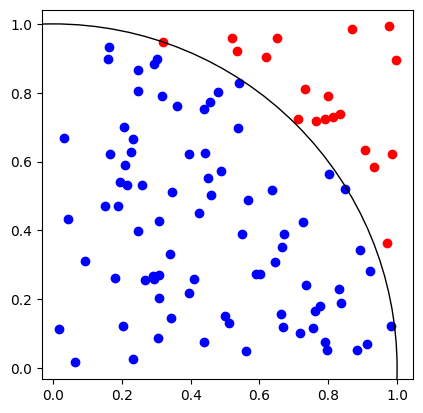

In [ ]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }

import random

# Wir definieren eine Menge an Punkten, die wir zufällig auf einer Fläche verteilen wollen

n = 100

# Eine Liste von Punkten auf der Fläche vorbereiten

points = []

# Jeder Punkt hat einen zufälligen x und y Wert, der gleich verteilt zwischen 0 und 1 liegt

# Hierzu brauchen wir einen For-loop, der n-mal durchläuft for i in range(n)
# Im Loop erstellen wir zwei zufällige Werte x und y mit random.random()
# Diese Werte fügen wir in die Liste points ein
for i in range(n):
    x = random.random()
    y = random.random()
    points.append([x, y])

# Für jeden Punkt in der Liste points, müssen wir nun berechnen, ob er innerhalb des Kreises liegt
# Wir merken uns, wie viele der n Punkte innerhalb des Kreises liegen
    
n_inside = 0

for point in points:
    x = point[0]
    y = point[1]
    if x**2 + y**2 < 1:
        n_inside = n_inside + 1

print("We have " + str(n_inside) + " of " + str(n) + " points inside the circle")

# Da wird nur ein Viertel des Kreises betrachten und unser Quadrat insgesamt 1x1 groß ist, können wir die Fläche des Kreises berechnen
pi = 4 * n_inside / n

print("The value of pi is approximately " + str(pi))

# Visualisierung
import matplotlib.pyplot as plt

# Wir erstellen eine Liste von x und y Werten, die wir plotten wollen
x_inside = []
y_inside = []
x_outside = []
y_outside = []

for point in points:
    x = point[0]
    y = point[1]
    if x**2 + y**2 < 1:
        x_inside.append(x)
        y_inside.append(y)
    else:
        x_outside.append(x)
        y_outside.append(y)

plt.scatter(x_inside, y_inside, color="blue")
plt.scatter(x_outside, y_outside, color="red")

# Change the aspect ratio to make the plot look like a circle
plt.gca().set_aspect('equal', adjustable='box')

# Make the plot look like a circle
circle = plt.Circle((0, 0), 1, color='black', fill=False)
plt.gca().add_artist(circle)

plt.show()
